In [1]:
#Here we import the necessary modules to activate the API.
#Note my set up my differ from yours since I am using Python 3.5

##Importing Pandas and Numpy
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
##Import Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [6]:
#Importing GA object
import pandas.io.ga as ga

##There were a few issues when setting this up for Python 3.5 please feel free to ask anything questions with the setup

In [7]:
current_week = ga.read_ga(
    account_id  = "56068633",
    profile_id  = "106536610",
    property_id = "UA-56068633-2",
    metrics     = ['users', 'pageviews',"newUsers","bounceRate","sessions","bounces","hits","goalCompletionsAll"],
    dimensions  = ['userType'],
    start_date  = "2016-11-13",
    end_date    = "2016-11-19",
    index_col   = 0,
    filters     = "pagePath=~/",
)

#The following is required "metrics", "dimensions" and "start_date". 
#Though it is best to specificy which account and view you wish to access

In [8]:
## Now we run a variable current_week to see how the data is presented
## This variable shows us the current week(at the time) and returns the above metrics and dimensions
current_week

,users,pageviews,newUsers,bounceRate,sessions,bounces,hits,goalCompletionsAll
userType,,,,,,,,
New Visitor,6,8,6,50.0,6,3,9,2


In [9]:
# Now we create a variable for the previous week with the same metrics
previous_week = ga.read_ga(
    account_id  = "56068633",
    profile_id  = "106536610",
    property_id = "UA-56068633-2",
    metrics     = ['users', 'pageviews',"newUsers","bounceRate","sessions","bounces","hits","goalCompletionsAll"],
    dimensions  = ['userType'],
    start_date  = "2016-11-06",
    end_date    = "2016-11-12",
    index_col   = 0,
)

In [10]:
previous_week

,users,pageviews,newUsers,bounceRate,sessions,bounces,hits,goalCompletionsAll
userType,,,,,,,,
New Visitor,3,3,3,100.0,3,3,3,0


In [11]:
current_df = pd.DataFrame(current_week)
previous_df = pd.DataFrame(previous_week)

frames = [current_df,previous_df]

result = pd.concat(frames)

In [12]:
##Check our result
result

,users,pageviews,newUsers,bounceRate,sessions,bounces,hits,goalCompletionsAll
userType,,,,,,,,
New Visitor,6,8,6,50.0,6,3,9,2
New Visitor,3,3,3,100.0,3,3,3,0


In [13]:
#Using pandas we will create a new column called "Week" and insert before the "users" column which week corresponds 
#to which row
result.insert(0,"Week",["current_week","previous_week"],allow_duplicates=False)

In [14]:
result

,Week,users,pageviews,newUsers,bounceRate,sessions,bounces,hits,goalCompletionsAll
userType,,,,,,,,,
New Visitor,current_week,6,8,6,50.0,6,3,9,2
New Visitor,previous_week,3,3,3,100.0,3,3,3,0


In [15]:
#We create a variable called pct_diff that will contain the value
pct_diff = result.set_index("Week").pct_change(periods=1)

In [16]:
pct_diff

,users,pageviews,newUsers,bounceRate,sessions,bounces,hits,goalCompletionsAll
Week,,,,,,,,
current_week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_week,-0.5,-0.625,-0.5,1.0,-0.5,0.0,-0.666667,-1.0


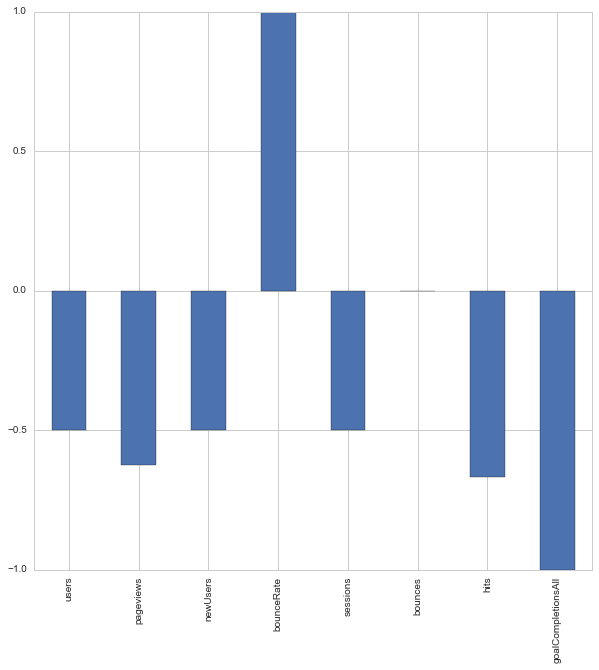

In [17]:
pct_diff.iloc[1].plot(kind="bar",figsize=(10,10))

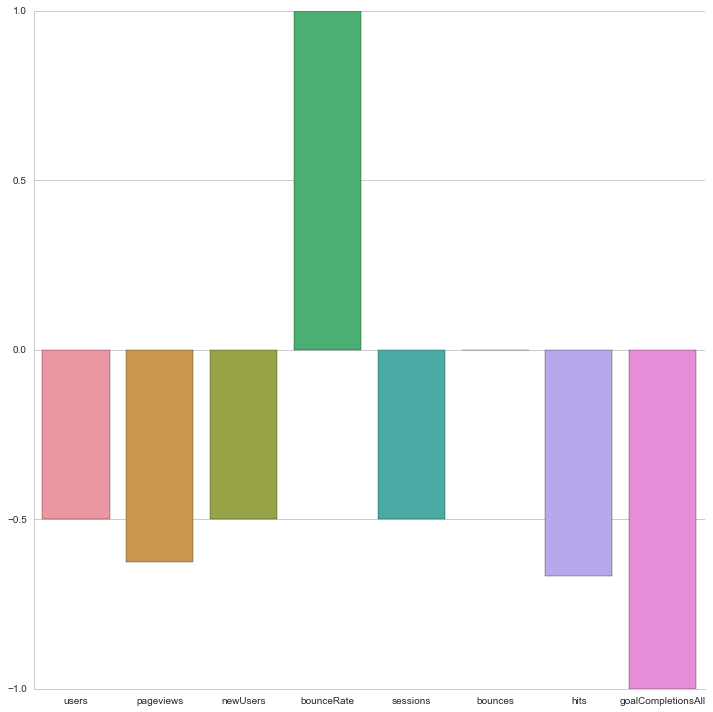

In [26]:
#Using Seaborn to plot the size of the chart
sns.factorplot(data=pct_diff,kind="bar",size=10)

In [33]:
##create a table with information with traffic sources
traffic_sources_data = ga.read_ga(
    account_id  = "56068633",
    profile_id  = "106536610",
    property_id = "UA-56068633-2",
    metrics     = ['pageviewsPerSession','avgTimeOnPage','goalCompletionsAll'],
    dimensions  = ['sourceMedium'],
    start_date  = "2016-09-01",
    end_date    = "2016-11-19",
    index_col   = 0,
)

In [34]:
traffic_sources_data

,pageviewsPerSession,avgTimeOnPage,goalCompletionsAll
sourceMedium,,,
(direct) / (none),1.000000,0.000000,0
google / organic,1.250000,59.333333,0
robpercival.co.uk / referral,1.235294,235.583333,4
testFrancisco / testFrancisco,3.222222,262.600000,0
timer4web.com / referral,1.000000,0.000000,0


In [39]:
## we are going to create a new table with a filter to show only this specific data source
rob_traffic_data = ga.read_ga(
    account_id  = "56068633",
    profile_id  = "106536610",
    property_id = "UA-56068633-2",
    metrics     = ['pageviewsPerSession','avgTimeOnPage','goalCompletionsAll'],
    dimensions  = ['sourceMedium'],
    start_date  = "2016-09-01",
    end_date    = "2016-11-19",
    filters     = "sourceMedium==robpercival.co.uk / referral",
    index_col   = 0,
)

In [40]:
rob_traffic_data

,pageviewsPerSession,avgTimeOnPage,goalCompletionsAll
sourceMedium,,,
robpercival.co.uk / referral,1.235294,235.583333,4


In [45]:
rob_df = pd.DataFrame(rob_traffic_data)

In [48]:
rob_df["avgTimeInMinutes"] = rob_df["avgTimeOnPage"] / 60

In [49]:
rob_df

,pageviewsPerSession,avgTimeOnPage,goalCompletionsAll,avgTimeInMinutes
sourceMedium,,,,
robpercival.co.uk / referral,1.235294,235.583333,4,3.926389
